In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from scipy import stats
!pip install joypy
import joypy

    1. Análise descritiva dos dados (EDA)


    1. Construa uma análise descritiva extraindo conhecimento das variáveis e apresentando quais insights podem ser obtidos a partir delas;
    2. Mostre-nos um caminho para selecionar graficamente as variáveis mais ou menos importantes para cada problema, como elas se relacionam e porquê.
    3. Em cada problema descreva quais outras técnicas poderiam ser aplicadas e porquê você não as escolheu.
    4. Utilize os dados: eda_receitas_data.zip

In [2]:
receitas = pd.read_json('receitas.json')

In [3]:
receitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [4]:
receitas_num = receitas[['fat','calories','protein','rating','sodium']]

(0.0, 10.0)

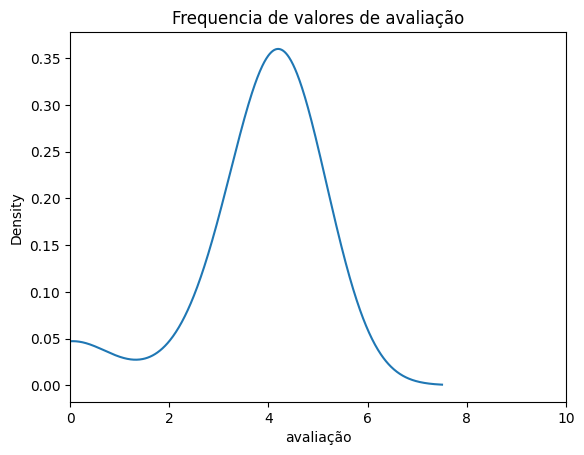

In [8]:
receitas['rating'].plot.kde(bw_method=0.6)
plt.title('Frequencia de valores de avaliação')
plt.xlabel('avaliação')
plt.xlim(0,10)

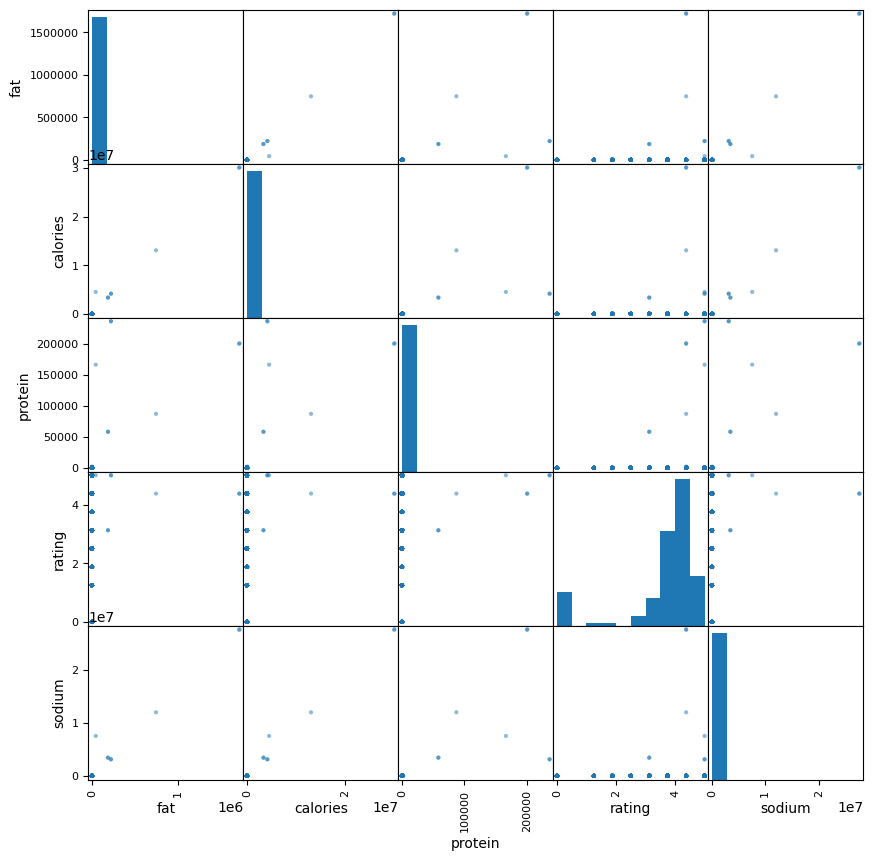

In [10]:
pd.plotting.scatter_matrix(receitas,figsize=(10,10));

Existe uma correlação positiva entre gordura x calorias,gordura x sodio, calorias x sodio

As avaliações são uniformes para os valores de sodio,proteina,calorias e gordura

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<AxesSubplot:>

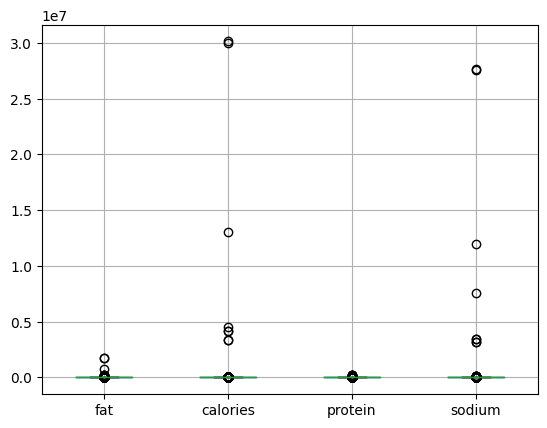

In [11]:
receitas_num.fillna(0,inplace=True)
receitas_num.boxplot(column=['fat','calories','protein','sodium'])  
#receitas_num.boxplot(column=['fat','calories','protein','sodium'])  

<AxesSubplot:>

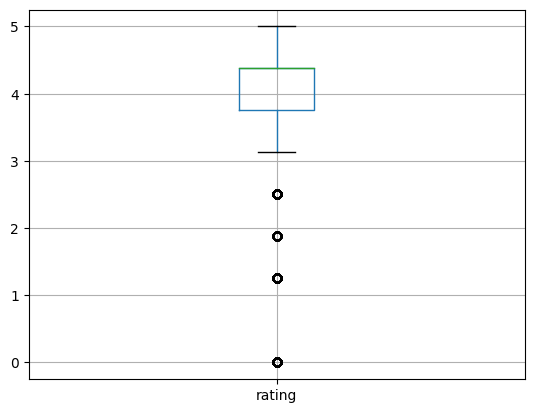

In [12]:
receitas_num.boxplot(column=['rating'])  

A maior parte das receitas é vem avaliada

<AxesSubplot:>

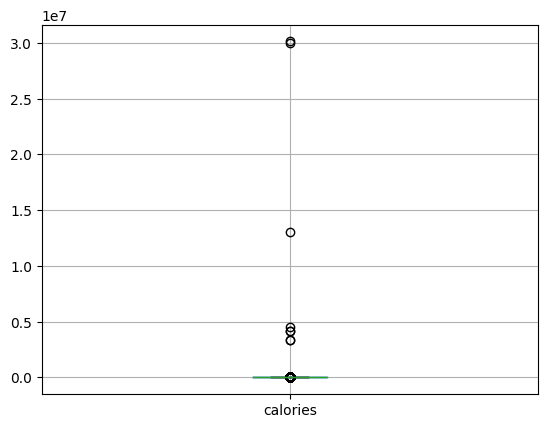

In [13]:
receitas_num.boxplot(column=['calories'])  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


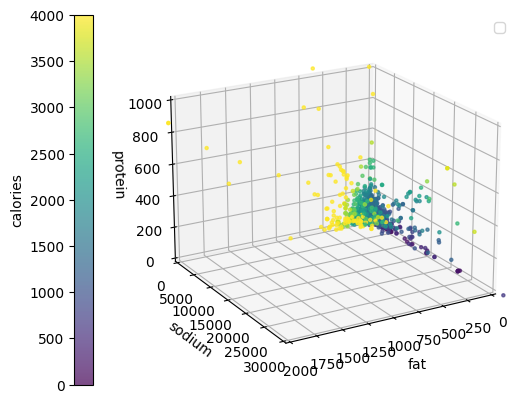

In [70]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = receitas_num['fat']
y = receitas_num['sodium']
z = receitas_num['protein']
c = receitas_num['calories']
ax.set_xlabel('fat')
ax.set_xlim(0,2000)
ax.set_ylabel('sodium')
ax.set_ylim(0,30000)
ax.set_zlabel('protein')
ax.set_zlim(0,1000)
#ax.set_clabel('calories')
ax.legend()

graph= ax.scatter(x, y, z, c=c,vmin=0, vmax=4000, marker='o',s=5,alpha=0.7)
plt.colorbar(graph,location='left',label='calories')
ax.set_xlabel('fat')
ax.set_ylabel('sodium')
ax.set_zlabel('protein',ha='right')
ax.view_init(20, 60)
plt.show()

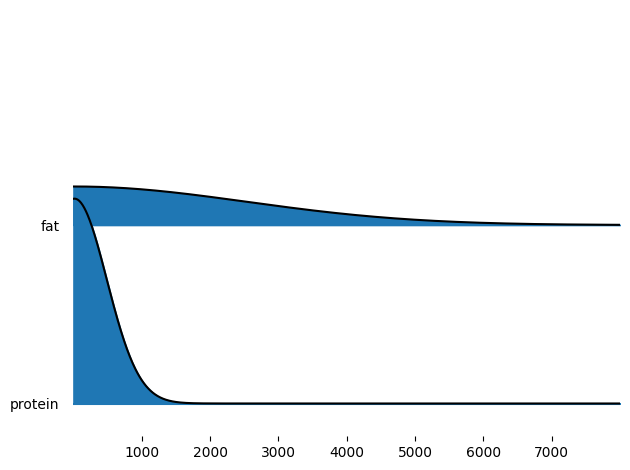

In [109]:
z=pd.DataFrame(receitas_num[['fat','protein']].copy())
fig, ax = joypy.joyplot(z,x_range=[0,8000])

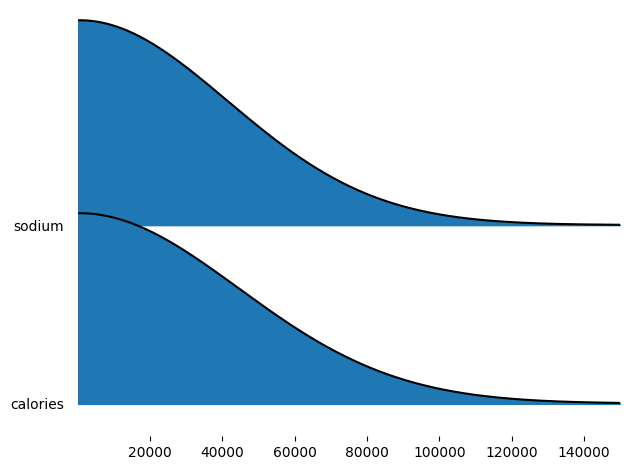

In [113]:
z=pd.DataFrame(receitas_num[['sodium','calories']].copy())
fig, ax = joypy.joyplot(z,x_range=[0,150000])

Podemos ver que receitas com mais gordura são mais caloricas. As receitas em geral  possuem muito sódio e são caloricas e não possuem muita proteína

A maior parte das receitas é bem avaliada

Variáveis para cada problema:

Se deseja-se as variáveis que produzem receitas com menor ou maior gordura: calorias,proteina e sódio são os melhores preditores,pelo grafico de correlações

Se deseja-se as variáveis que produzem receitas com menos ou mais calorias: gordura,proteina e sódio são os melhores preditores

Se deseja-se as variáveis que produzem receitas com menos ou mais proteinas: gordura,calorias e sódio são os melhores preditores

Se deseja-se as variáveis que produzem receitas com menos ou mais sodio: gordura,calorias e proteina são os melhores preditores

Causalidade(arvore de decisão contrafactual) poderia ser utilizada para confirmar estas observações.O problema na causalidade é selecionar
os efeitos fixos e variáveis, que não estao muito claros. Considero o melhor metodo uma arvore regressora,utilizando o grafico
de importancia para confirmar a hipotese.Nao utilizaria regressão por ser dificil selecionar qual distribuição.

In [16]:
from collections import Counter
from  itertools import chain

c = Counter(chain.from_iterable(receitas[receitas['calories']<198]['categories']))
out = [a for a, b in c.most_common(10)]

## Tipos de receitas menos caloricas

In [17]:
# Tipos de receitas menos caloricas
out

['Vegetarian',
 'Gourmet',
 'Peanut Free',
 'Bon Appétit',
 'Soy Free',
 'Tree Nut Free',
 'Kosher',
 'Pescatarian',
 'Quick & Easy',
 'Wheat/Gluten-Free']

In [18]:
receitas[receitas['calories']<198]['title'].head(10)

2                         Potato and Fennel Soup Hodge 
8                                Korean Marinated Beef 
13              Beef Tenderloin with Garlic and Brandy 
14                                       Peach Mustard 
16                       Sweet Buttermilk Spoon Breads 
18    Mozzarella-Topped Peppers with Tomatoes and Ga...
25                              Garlic Baguette Crumbs 
27                                   Dried Pear Crisps 
33                                         Deviled Ham 
37                               Sauteed Broccoli Rabe 
Name: title, dtype: object

## Tipos de receitas mais caloricas

In [19]:
c = Counter(chain.from_iterable(receitas[receitas['calories']>1000]['categories']))
out = [a for a, b in c.most_common(10)]
# Tipos de receitas mais caloricas
out

['Bon Appétit',
 'Peanut Free',
 'Soy Free',
 'Gourmet',
 'Tree Nut Free',
 'Dinner',
 'Winter',
 'Roast',
 'Bake',
 'Chicken']

In [20]:
receitas[receitas['calories']>1000]['title'].head(10)

53          Pancetta Roast Chicken with Walnut Stuffing 
80     Braised Chicken and Rice with Orange, Saffron,...
87                Roast Chicken With Sorghum and Squash 
94            Lamb Shanks Braised with Anise and Orange 
109    Banana Split with Curried Chocolate-Coconut Sa...
193      Chili Meatballs in Black Bean and Tomato Sauce 
204                       Chicken and Sausage Jambalaya 
246                                 Herb-Roasted Turkey 
255    Cider-Braised Pheasant with Pearl Onions and A...
282    Braised Short Ribs with Garbanzo Beans and Rai...
Name: title, dtype: object

1. Construa um classificador e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 

a. métricas: precision, recall e F1-score;

b. dados: classification_data.zip;

In [21]:
treino = pd.read_csv('classification_train.csv')
teste = pd.read_csv('classification_test.csv')

In [22]:
treino

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1
...,...,...,...
665,0.690181,-0.800060,1
666,1.043712,-0.212964,1
667,1.821542,-0.406377,1
668,0.031938,1.424103,0


In [23]:
teste

,x1,x2,target
0,1.114204,-0.434321,1
1,-1.238490,0.521390,0
2,-0.091781,-0.169471,1
3,0.298820,0.076368,0
4,-0.265779,0.479812,1
...,...,...,...
325,0.201339,-0.256856,1
326,-0.877304,0.161447,0
327,0.297281,0.760907,0
328,0.032457,0.297988,0


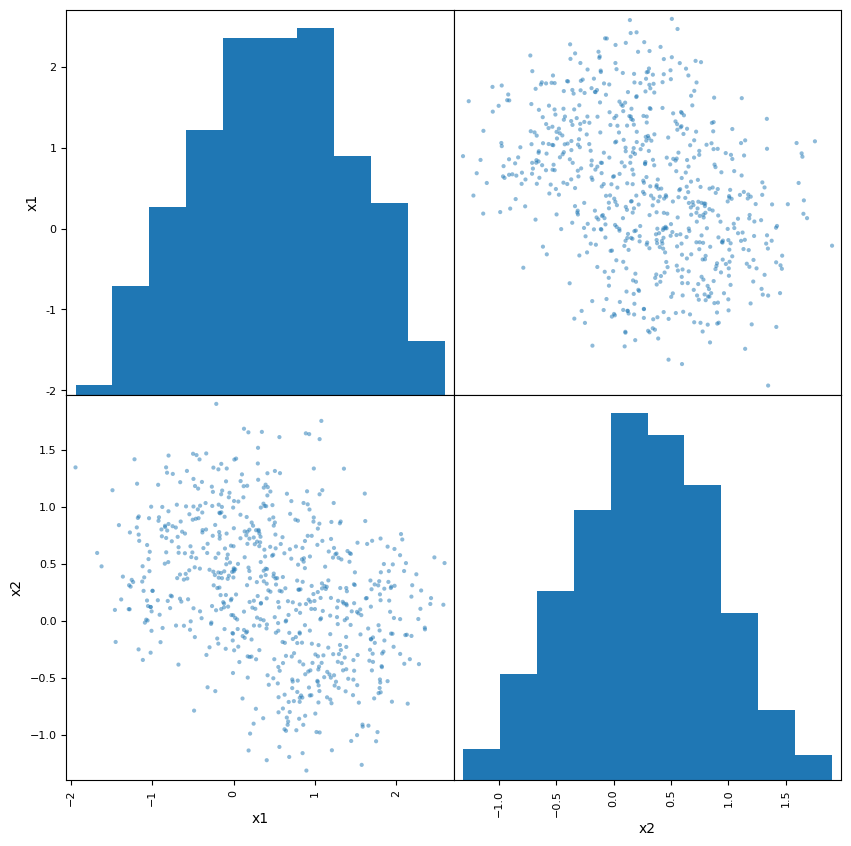

In [24]:
treino = treino.drop(['target'], axis=1)
pd.plotting.scatter_matrix(treino,figsize=(10,10));

In [25]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



treino = pd.read_csv('classification_train.csv')
teste = pd.read_csv('classification_test.csv')
X_train = treino.drop(['target'], axis=1).to_numpy()
y_train = treino['target'].to_numpy()
X_test = teste.drop(['target'], axis=1).to_numpy()
y_test = teste['target'].to_numpy()
# fit do modelo no treinamento
model = XGBClassifier()
model.fit(X_train, y_train)
# predicoes no teste
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# avaliar predicoes
accuracy = accuracy_score(y_test, predictions)
print("Acurácia: %.2f%%" % (accuracy * 100.0))
y_true = y_test
target_names = ['class0','class1']
print(classification_report(y_true, y_pred, target_names=target_names))

Acurácia: 86.36%
              precision    recall  f1-score   support

      class0       0.87      0.86      0.87       169
      class1       0.86      0.86      0.86       161

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



A precisão e recorrência ficaram bem altas para as duas classes. As classes são bem balanceadas.

{0: 'x1', 1: 'x2'}


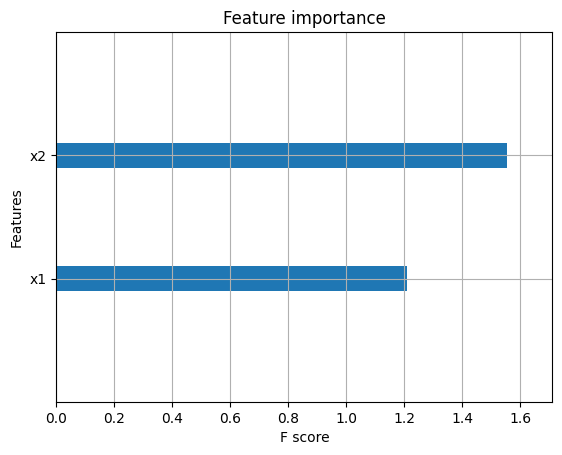

In [26]:
from xgboost import plot_importance
# create dict to use later
myfeatures = treino.drop(['target'], axis=1).columns


# feat importance with names f1,f2,...
axsub = plot_importance(model ,importance_type='gain',show_values=False)



# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(myfeatures,start=0))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]
axsub.set_yticklabels(lst_yticklabels)
print(dict_features)
plt.show()

A variável x2 é a mais importante, já que x1 e x2 não são correlacionadas.

2. Selecione um sku (produto) e realize uma previsão da demanda do mesmo nos próximos 4 intervalos de tempo de sua escolha (dia, semana, mês, etc) 
        a. métricas: rmse, mape;
        b. dados: time_series_data.xlsx;

In [27]:
!pip install openpyxl
time_series = pd.read_excel('time_series_data.xlsx', engine='openpyxl')

Text(0, 0.5, 'Vendas')

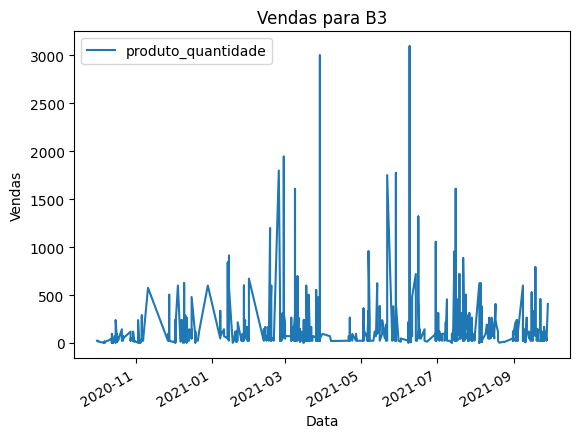

In [28]:
time_series2 = time_series[time_series['produto_descricao']=='B3'][['produto_descricao','nota_data_emissao','produto_quantidade']]
time_series2['data'] = time_series2['nota_data_emissao'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
time_series2 = time_series2.drop(['nota_data_emissao'], axis=1)
time_series2.plot('data','produto_quantidade')
plt.title('Vendas para B3')
plt.xlabel('Data')
plt.ylabel('Vendas')

In [29]:
# gerar colunas defasadas no tempo
dataframe = time_series2
for i in range(12, 0, -1):
   dataframe['t-' + str(i)] = dataframe.produto_quantidade.shift(i)
final_data = dataframe.copy()
final_data.dropna(inplace=True)
final_data['year+w'] = time_series2['data']
final_data['year+w'] = final_data['year+w'].astype(str)
final_data['year+w'] = final_data['year+w'].str[-2:]
# gerar dummys das semanas para sazonalidade
dummy = pd.get_dummies(final_data['year+w'])
final_data = pd.concat([final_data, dummy], axis=1)
final_data = final_data.drop(['year+w'], axis=1)
final_data = final_data.reset_index()
final_data = final_data.drop(['index','produto_descricao'],axis=1)
final_data = final_data.sort_values(by=['data']).reset_index()
mask = (final_data['data'] > '2020-10-01') & (final_data['data'] < '2021-6-01')
final_data = final_data.drop(['index'],axis=1)
print(final_data.loc[mask])
datas = final_data['data']
final_data = final_data.drop(['data'],axis=1)
# mostrar as colunas que estou usando
print(final_data.columns)
finaldf_train_x = final_data.loc[0:542, final_data.columns != 'produto_quantidade']
finaldf_train_y = final_data.loc[0:542,'produto_quantidade']
# treinamento
rfe = RandomForestRegressor(n_estimators=100)
fit = rfe.fit(finaldf_train_x, finaldf_train_y)
finaldf_test_x = final_data.loc[543:, final_data.columns != 'produto_quantidade']
# predição e analise
y_pred = fit.predict(finaldf_test_x)
expected = final_data.loc[543:, final_data.columns == 'produto_quantidade']['produto_quantidade'].to_list()
predictions = y_pred
mse = mean_squared_error(expected, predictions)
mape = mean_absolute_percentage_error(expected, predictions)
rmse = sqrt(mse)
print('Random Forest')
print('RMSE: %f' % rmse)
print('MAPE: %f' % mape)

     produto_quantidade       data   t-12   t-11   t-10    t-9     t-8  \
1                    16 2020-10-02    2.0    2.0    6.0    8.0    15.0   
2                    24 2020-10-02  240.0  576.0  840.0    1.0     1.0   
3                     1 2020-10-07    2.0    2.0    2.0    6.0     8.0   
4                    16 2020-10-07  144.0  576.0  240.0  240.0   576.0   
5                     1 2020-10-07   24.0   24.0   48.0   72.0   144.0   
..                  ...        ...    ...    ...    ...    ...     ...   
538                  24 2021-05-29    1.0   11.0   21.0   24.0    24.0   
539                  48 2021-05-29   24.0   24.0   24.0   24.0    24.0   
540                  24 2021-05-29  240.0   48.0   48.0   24.0    24.0   
541                  48 2021-05-31   24.0   24.0   24.0   24.0    24.0   
542                  24 2021-05-31  240.0   72.0  144.0  960.0  1056.0   

        t-7    t-6    t-5  ...  22  23  24  25  26  27  28  29  30  31  
1      20.0   24.0   24.0  ...   0   0

In [30]:
pltd = pd.DataFrame(data = [predictions,expected]).T.rename(columns={0:'predição',1:'esperado'})
pltd['data'] = datas.loc[543:].values

In [31]:
pltd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   predição  332 non-null    float64       
 1   esperado  332 non-null    float64       
 2   data      332 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.9 KB


Text(0, 0.5, 'Vendas')

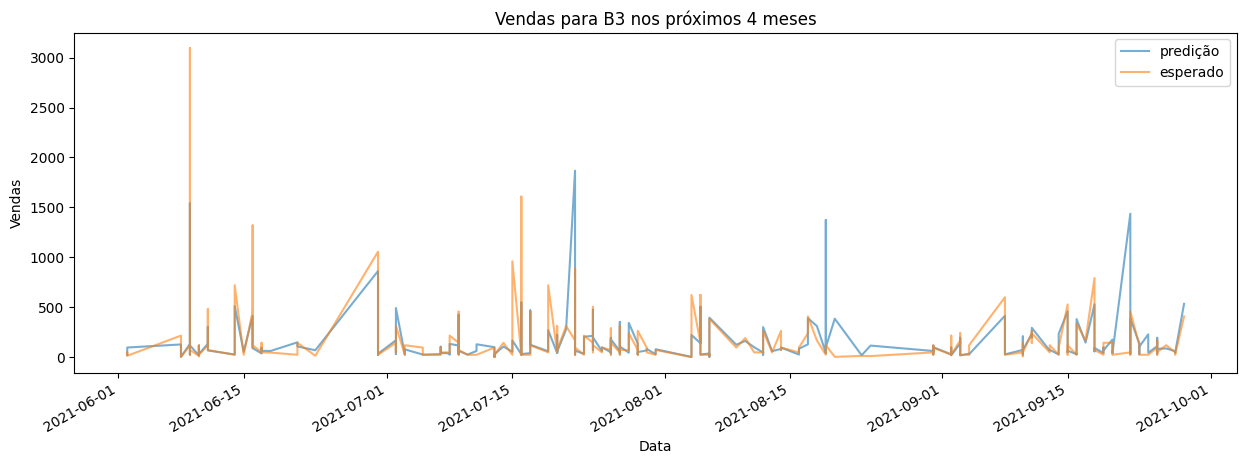

In [32]:
pltd.set_index('data').plot(figsize=(15,5),alpha=0.6)
plt.title('Vendas para B3 nos próximos 4 meses')
plt.xlabel('Data')
plt.ylabel('Vendas')

3. Construa um regressor e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 
        a. métricas: RMSE, R2 e cor(target_observado, target_predito);
        b. dados: regression_data.zip.

In [33]:
reg_treino = pd.read_csv('regression_train.csv')
reg_teste = pd.read_csv('regression_test.csv')

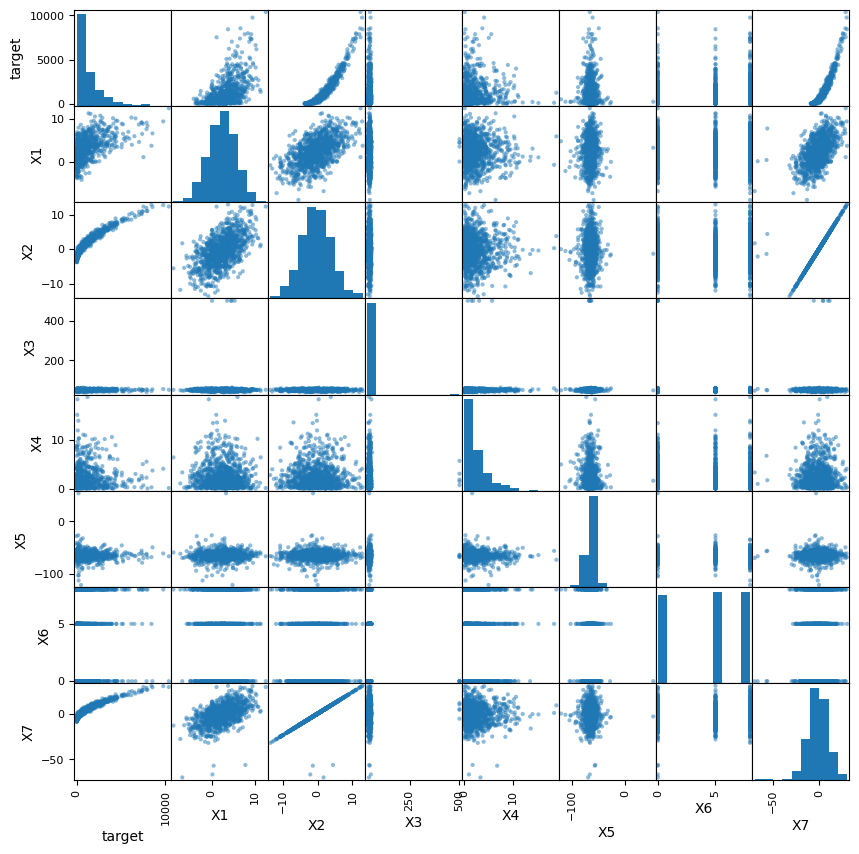

In [34]:
pd.plotting.scatter_matrix(reg_treino,figsize=(10,10));

In [35]:
# Remover variáveis correlacionadas
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out
reg_treino2 = trimm_correlated(reg_treino.drop(['target'],axis=1), 0.6)

In [36]:
reg_treino2['target']= reg_treino['target']

In [37]:
# treinamento
reg_treino2.fillna(0,inplace=True)
reg_teste.fillna(0,inplace=True)
rfe = RandomForestRegressor(n_estimators=100)
fit = rfe.fit(reg_treino2.drop(['target'],axis=1), reg_treino2['target'])
test_x = reg_teste.drop(['target','X7'],axis=1)
# predição e analise
y_pred = fit.predict(test_x)
expected = reg_teste['target'].to_list()
predictions = y_pred
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
r2 = r2_score(expected, predictions)
print('Random Forest')
print('RMSE: %f' % rmse)
print('R2: %f' % r2)
corr, _ = pearsonr(expected, predictions)
print('Pearsons correlation: %.3f' % corr)

Random Forest
RMSE: 403.878857
R2: 0.879319
Pearsons correlation: 0.938


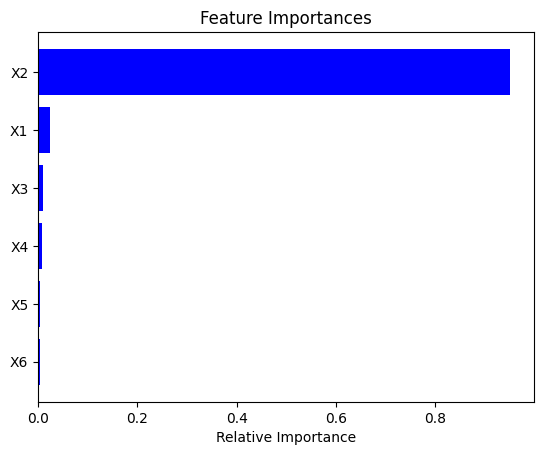

In [38]:
features = test_x.columns.to_list()
importances = rfe.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


As variáveis de maior importància são X2,X1,X3,X4

Pelos gŕaficos de correlação é possível ver a forte interação entre X2 e a variável alvo

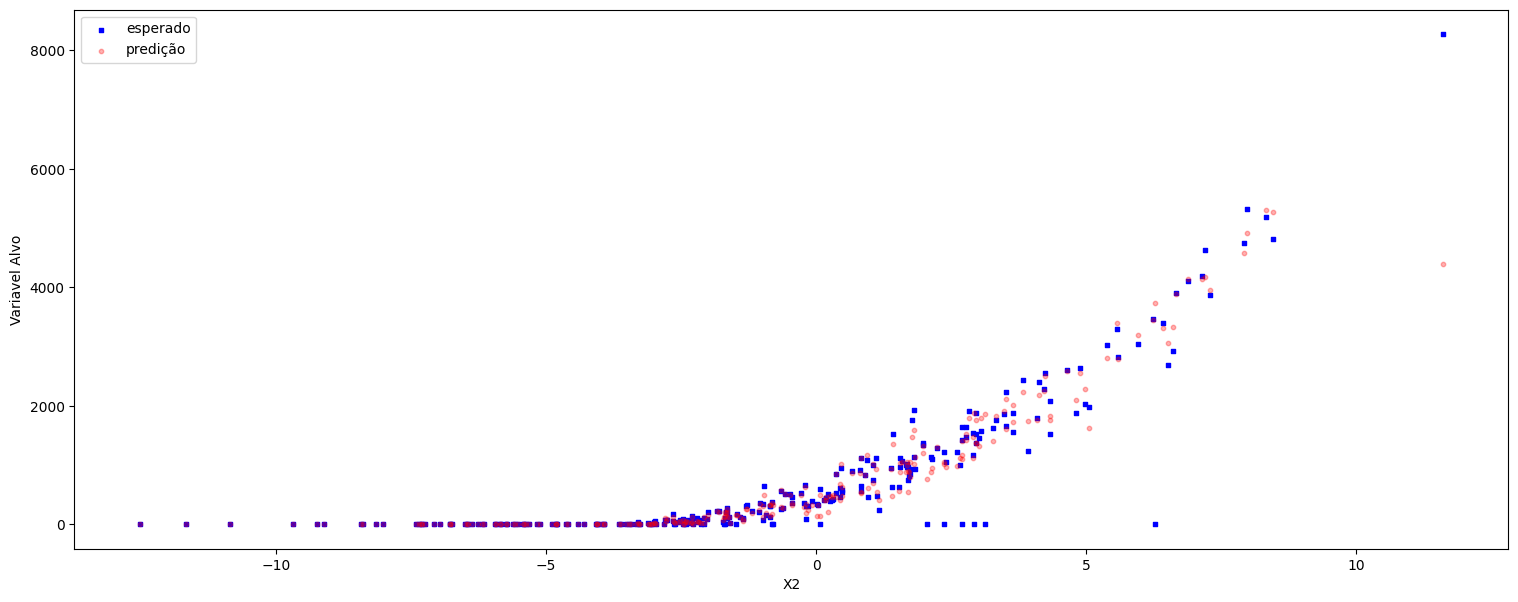

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(reg_teste['X2'], expected, s=10, c='b', marker="s", label='esperado')
ax1.scatter(reg_teste['X2'],predictions, s=10, c='r', marker="o", label='predição',alpha=0.3)
plt.legend(loc='upper left')
plt.xlabel('X2')
plt.ylabel('Variavel Alvo')
fig.set_size_inches(18.5, 7)
plt.show()
